In [1]:
!pip install matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

You are using pip version 9.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
import solovay_kitaev as sk
from math import e, pi

# Basic usage

In [3]:
# Unitary matrix you want to approximate
# Rz(1/16)
target = sk.Uop.from_matrix([[1,0],[0, e**(1j*pi/16)]], gateset=sk.clifford_gateset())

# execute Solovay Kitaev algorithm
result = sk.execute_solovay_kitaev(target, 4)

# print out the calculated gates
print(result.construction_str())

(I+iX)T(I+iY)T(I+iY)T(I-iX)Z(I+iX)T(I-iY)(I-iZ)Z(I+iX)XTX(I-iY)XTX(I-iY)XTX(I-iX)(I+iZ)(I+iY)XTX(I-iX)(I+iX)T(I+iX)T(I+iY)T(I+iY)(I-iZ)(I+iX)T(I+iY)T(I+iY)T(I-iX)Z(I+iX)T(I+iX)T(I+iX)T(I+iX)Z(I+iX)XTX(I-iY)XTX(I-iY)XTX(I-iX)(I-iX)XTX(I-iX)XTX(I-iX)XTX(I-iX)(I+iX)T(I-iY)(I-iZ)(I+iZ)(I-iY)XTX(I-iY)XTX(I-iX)XTX(I-iX)(I+iX)XXTXX(I-iY)(I-iZ)(I+iX)XXTXX(I+iY)XXTXX(I+iY)XXTXX(I-iX)Z(I+iZ)(I+iY)XTX(I-iX)Z(I+iX)XTX(I-iY)XTX(I-iY)XTX(I-iX)(I+iZ)(I+iY)XTX(I-iX)(I+iX)XXTXX(I+iX)XXTXX(I+iX)XXTXX(I+iX)(I+iX)XXTXX(I+iY)XXTXX(I+iY)XXTXX(I-iX)Z(I-iX)XTX(I-iX)XTX(I-iX)XTX(I-iX)Z(I+iX)XTX(I-iY)XTX(I-iY)XTX(I-iX)T(I+iY)T(I+iX)TZT(I+iX)T(I+iY)TX(I+iZ)ZXTX(I-iX)XTX(I-iY)XTX(I-iZ)XXTX(I-iY)XTX(I-iX)XTX(I+iX)T(I+iY)T(I+iY)T(I-iX)Z(I+iY)T(I+iX)T(I+iY)T(I+iX)(I+iZ)(I+iY)T(I+iY)T(I+iX)T(I+iY)Z(I-iZ)(I-iX)XTX(I-iY)XTX(I-iX)XTX(I-iY)Z(I-iY)XTX(I-iX)XTX(I-iY)XTX(I-iY)(I+iY)T(I-iY)(I+iY)T(I-iY)(I+iX)T(I-iY)(I-iZ)(I+iY)XTX(I-iY)(I+iZ)(I+iY)XTX(I-iX)T(I+iY)XTX(I-iY)(I+iY)XXTXX(I+iY)XXTXX(I+iX)XXTXX(I+iY)Z(I+iY)XXTXX(I

In [4]:
# (number of gates, distance) per iteration
counts = 10
x = [x for x in range(counts)]
distances = []
length = []
number_T = []

for i in range(counts):
    result = sk.execute_solovay_kitaev(target, i)
    l = len(result.construction)
    d = target.operator_distance(result)
    t = len([t for t in result.construction if t == 'T'])
    length.append(l)
    distances.append(d)
    number_T.append(t)
    print("iteration: {}, length: {} (T gates {} / {:.4f}%), distance: {:e}".format(i
                                                                    , l, t, (t/l*100 if l!=0 else 0), d))

iteration: 0, length: 0 (T gates 0 / 0.0000%), distance: 9.813535e-02
iteration: 1, length: 18 (T gates 4 / 22.2222%), distance: 2.921613e-01
iteration: 2, length: 224 (T gates 48 / 21.4286%), distance: 1.767862e-01
iteration: 3, length: 1278 (T gates 252 / 19.7183%), distance: 5.802140e-02
iteration: 4, length: 7938 (T gates 1348 / 16.9816%), distance: 4.842463e-02
iteration: 5, length: 44146 (T gates 6652 / 15.0682%), distance: 1.262261e-03
iteration: 6, length: 254102 (T gates 34060 / 13.4041%), distance: 3.237282e-04
iteration: 7, length: 1390774 (T gates 168068 / 12.0845%), distance: 8.427118e-06
iteration: 8, length: 7447734 (T gates 820164 / 11.0123%), distance: 3.202771e-08
iteration: 9, length: 40601550 (T gates 4102028 / 10.1031%), distance: 1.720606e-09


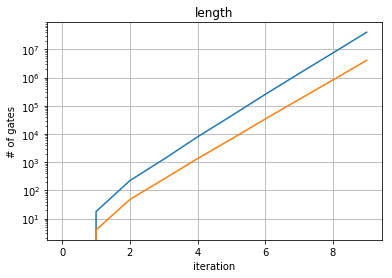

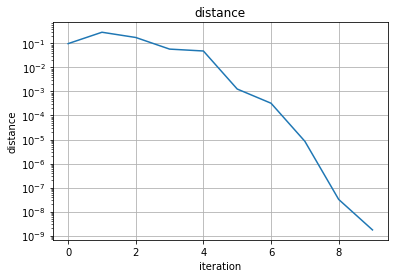

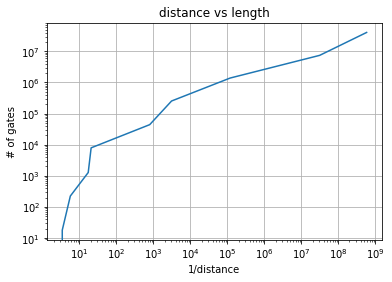

In [5]:
plt.figure()
#plt.subplot(3,1,1)
plt.plot(x, length)
plt.plot(x, number_T)
plt.yscale('log')
plt.title('length')
plt.xlabel('iteration')
plt.ylabel('# of gates')
plt.grid(True)

plt.figure()
#plt.subplot(3,1,2)
plt.plot(x, distances)
plt.yscale('log')
plt.title('distance')
plt.xlabel('iteration')
plt.ylabel('distance')
plt.grid(True)

plt.figure()
#plt.subplot(3,1,3)
plt.plot([1.0/d for d in distances], length)
plt.yscale('log')
plt.xscale('log')
plt.title('distance vs length')
plt.xlabel('1/distance')
plt.ylabel('# of gates')
plt.grid(True)


In [9]:
# another interesting fact is the result is strongly influenced by the initial e-net
# let's try the 7-round solovary-kitaev calculation with different ε0 nets
counts = 5
#x = [x for x in range(counts)]
x = []
distances = []
length = []
number_T = []

for i in range(counts):
    enet = sk.clifford_gateset(i).epsilon_net()
    x.append(len(enet))
    target = sk.Uop.from_matrix([[1,0],[0, e**(1j*pi/16)]], gateset=sk.clifford_gateset(i))
    result = sk.execute_solovay_kitaev(target, i)
    l = len(result.construction)
    d = target.operator_distance(result)
    t = len([t for t in result.construction if t == 'T'])
    length.append(l)
    distances.append(d)
    number_T.append(t)
    print(f"ε0 depth:{i} (size:{len(enet)}), length: {l} (T gates {t} / {(t/l*100 if l!=0 else 0):.4f}%),"
          f" distance: {d:e}")

ε0 depth:0 (size:96), length: 0 (T gates 0 / 0.0000%), distance: 9.813535e-02
ε0 depth:1 (size:96), length: 18 (T gates 4 / 22.2222%), distance: 2.921613e-01
ε0 depth:2 (size:240), length: 80 (T gates 16 / 20.0000%), distance: 1.856696e-01
ε0 depth:3 (size:528), length: 1278 (T gates 252 / 19.7183%), distance: 5.802140e-02
ε0 depth:4 (size:1104), length: 12436 (T gates 2192 / 17.6262%), distance: 5.872347e-04


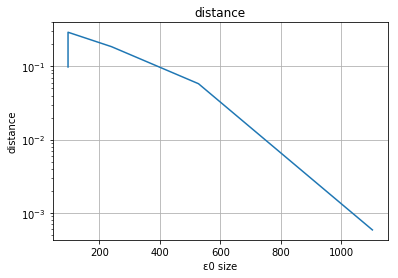

In [11]:
plt.figure()
plt.plot(x, distances)
plt.yscale('log')
plt.title('distance')
plt.xlabel('ε0 size')
plt.ylabel('distance')
plt.grid(True)